In [ ]:
# Importing necessary Python Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

# Loading Data

In [ ]:
#Loading the base file data (fetched from json)
processed_data = pd.read_csv(r'C:\Projects\a_health_data_analysis\firebase-health-data-analysis\data\2_processed_data.csv')
processed_data.head()

,date,ID,create_time,update_time,sleep_duration_hours,sleep_quality,sleep_interruptions,activity_sedentary_hours,activity_active_minutes,activity_steps,...,vitals_bp_1,vitals_bp_2,vitals_bp_3,vitals_bp_4,vitals_bp_5,vitals_temp_1,vitals_temp_2,vitals_temp_3,vitals_temp_4,vitals_temp_5
0,21/03/2025,1aNK0IlBlOGhWp0JIPGo,2025-03-27T11:43:39.925877Z,2025-03-27T11:43:39.925877Z,6.8,fair,2,9.7,38,5200,...,119/80,121/82,118/79,120/81,122/83,98.6,98.4,98.5,98.7,98.6
1,21/03/2025,2DCJ0E7x9uSiMc8M9Hje,2025-03-27T11:43:39.925877Z,2025-03-27T11:43:39.925877Z,6.8,fair,2,9.7,38,5200,...,119/80,121/82,118/79,120/81,122/83,98.6,98.4,98.5,98.7,98.6
2,17/03/2025,3xP5bsc13fVaehGMH2wd,2025-03-27T11:43:39.925877Z,2025-03-27T11:43:39.925877Z,6.5,poor,3,10.5,35,4500,...,120/80,122/82,118/79,121/81,125/83,98.6,98.4,98.7,98.5,98.8
3,28/03/2025,6r6bGwNOMEfTVRXMO9BR,2025-03-27T11:43:39.925877Z,2025-03-27T11:43:39.925877Z,6.0,poor,3,10.8,35,4800,...,125/82,127/84,124/81,126/83,128/85,98.9,98.7,99.0,98.8,99.1
4,19/03/2025,9A3FURfOO7c55asePIFn,2025-03-27T11:43:39.925877Z,2025-03-27T11:43:39.925877Z,8.1,good,1,8.2,55,8200,...,115/76,117/78,114/75,116/77,118/79,98.4,98.2,98.3,98.5,98.4


In [ ]:
#Loading the processed data - the cleaned dataset that is prepared for visualisation and modelling
cleaned_data = pd.read_csv(r'C:\Projects\a_health_data_analysis\firebase-health-data-analysis\data\cleaned_data.csv')
cleaned_data.head()

,sleep_duration_hours,sleep_quality,sleep_interruptions,activity_sedentary_hours,activity_active_minutes,activity_steps,nutrition_calories,nutrition_water_oz,nutrition_macro_fat_g,nutrition_macro_carbs_g,nutrition_macro_protein_g,avg_heart_rate,avg_temperature,avg_systolic_bp,avg_diastolic_bp,avg_bp
0,6.8,fair,2,9.7,38,5200,2100,48,58,270,90,72.00,98.56,120.0,81.0,120.0/81.0
1,6.8,fair,2,9.7,38,5200,2100,48,58,270,90,72.00,98.56,120.0,81.0,120.0/81.0
2,6.5,poor,3,10.5,35,4500,2200,45,60,290,85,72.17,98.60,121.2,81.0,121.2/81.0
3,6.0,poor,3,10.8,35,4800,2400,45,70,330,85,75.50,98.90,126.0,83.0,126.0/83.0
4,8.1,good,1,8.2,55,8200,1850,60,50,220,100,66.17,98.36,116.0,77.0,116.0/77.0


# Data Preparation

Basic Preparation for Model Training

In [123]:
#Displaying basic information about the dataset
print("Dataset Shape:", cleaned_data.shape)
print("\nColumn Types:")
print(cleaned_data.dtypes)

Dataset Shape: (20, 16)

Column Types:
sleep_duration_hours         float64
sleep_quality                 object
sleep_interruptions            int64
activity_sedentary_hours     float64
activity_active_minutes        int64
activity_steps                 int64
nutrition_calories             int64
nutrition_water_oz             int64
nutrition_macro_fat_g          int64
nutrition_macro_carbs_g        int64
nutrition_macro_protein_g      int64
avg_heart_rate               float64
avg_temperature              float64
avg_systolic_bp              float64
avg_diastolic_bp             float64
avg_bp                        object
dtype: object


In [124]:
#Dropping avg_bp as we have them in separate columns and those values would be more useful than having the bp as object type
cleaned_data.drop(columns=['avg_bp'], inplace=True)

In [125]:
#Checking for missing values
print("\nMissing Values:")
print(cleaned_data.isnull().sum())


Missing Values:
sleep_duration_hours         0
sleep_quality                0
sleep_interruptions          0
activity_sedentary_hours     0
activity_active_minutes      0
activity_steps               0
nutrition_calories           0
nutrition_water_oz           0
nutrition_macro_fat_g        0
nutrition_macro_carbs_g      0
nutrition_macro_protein_g    0
avg_heart_rate               0
avg_temperature              0
avg_systolic_bp              0
avg_diastolic_bp             0
dtype: int64


## Data Labeling

In [ ]:
#Labelling the data to generate the label for model
def classify_health(row):
    # Poor Health Conditions
    if (row['sleep_duration_hours'] < 6.5 or  
        row['sleep_quality'] == 'poor' or   
        row['sleep_interruptions'] >= 3 or
        row['avg_heart_rate'] > 80 or         
        row['avg_systolic_bp'] > 130 or       
        row['avg_diastolic_bp'] > 85 or      
        row['activity_steps'] < 5000):         
        return 'Poor'

    # Good Health Conditions
    elif (row['sleep_duration_hours'] > 8 and  
          row['sleep_quality'] in ['good', 'excellent'] and  
          row['sleep_interruptions'] <= 1 and
          row['avg_heart_rate'] < 70 and             
          row['avg_systolic_bp'] < 120 and    
          row['avg_diastolic_bp'] < 80 and   
          row['activity_steps'] > 8000):         
        return 'Good'

    else:
        return 'Moderate'
    
#Applying the function to the cleaned data, generating the label called 'Health Category'
cleaned_data['health_category'] = cleaned_data.apply(classify_health, axis=1)
cleaned_data

,sleep_duration_hours,sleep_quality,sleep_interruptions,activity_sedentary_hours,activity_active_minutes,activity_steps,nutrition_calories,nutrition_water_oz,nutrition_macro_fat_g,nutrition_macro_carbs_g,nutrition_macro_protein_g,avg_heart_rate,avg_temperature,avg_systolic_bp,avg_diastolic_bp,health_category
0,6.8,fair,2,9.7,38,5200,2100,48,58,270,90,72.00,98.56,120.0,81.0,Moderate
1,6.8,fair,2,9.7,38,5200,2100,48,58,270,90,72.00,98.56,120.0,81.0,Moderate
2,6.5,poor,3,10.5,35,4500,2200,45,60,290,85,72.17,98.60,121.2,81.0,Poor
3,6.0,poor,3,10.8,35,4800,2400,45,70,330,85,75.50,98.90,126.0,83.0,Poor
4,8.1,good,1,8.2,55,8200,1850,60,50,220,100,66.17,98.36,116.0,77.0,Good
5,7.0,fair,2,9.5,45,6000,2200,50,65,300,90,72.50,98.60,123.0,81.0,Moderate
6,5.5,poor,4,12.5,20,3200,2500,35,80,350,70,80.50,99.00,130.8,86.0,Poor
7,7.8,good,1,8.5,50,7800,1900,58,52,230,98,68.00,98.46,117.0,78.0,Moderate
8,8.7,good,1,6.2,80,11200,1800,75,45,210,115,62.50,98.10,109.0,69.0,Good
9,7.8,good,1,8.5,50,7800,1900,58,52,230,98,68.00,98.46,117.0,78.0,Moderate


## Feature Encoding

In [ ]:
#Applying One-Hot Encoding for Sleep Quality
cleaned_data_X = pd.get_dummies(cleaned_data, columns=['sleep_quality'],prefix=['sleep_quality'], drop_first=True, dtype=int)
cleaned_data_X = cleaned_data_X.drop(['health_category'], axis = 1)
cleaned_data_X.tail(1)

,sleep_duration_hours,sleep_interruptions,activity_sedentary_hours,activity_active_minutes,activity_steps,nutrition_calories,nutrition_water_oz,nutrition_macro_fat_g,nutrition_macro_carbs_g,nutrition_macro_protein_g,avg_heart_rate,avg_temperature,avg_systolic_bp,avg_diastolic_bp,sleep_quality_fair,sleep_quality_good,sleep_quality_poor
19,7.5,1,7.8,62,9500,1950,65,53,235,105,71.0,98.56,119.0,80.0,0,1,0


In [ ]:
#Applying Ordinal Encoding for the Label (Health Category)
order = ['Poor','Moderate','Good']
Or_hc = OrdinalEncoder(categories = [order])
Or_hc = Or_hc.fit(cleaned_data[['health_category']])
cleaned_data_y = pd.DataFrame(Or_hc.transform(cleaned_data[['health_category']]))
cleaned_data_y = cleaned_data_y.rename(columns = {0:'health_rank'})
cleaned_data_y

,health_rank
0,1.0
1,1.0
2,0.0
3,0.0
4,2.0
5,1.0
6,0.0
7,1.0
8,2.0
9,1.0


## Scaling Numeric Features

In [129]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cleaned_data_X)

## Train and Test Split

In [ ]:
#Splitting teh dataset into traina nd test split of 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    cleaned_data_y['health_rank'], 
    test_size=0.2, 
    random_state=42,
    stratify=cleaned_data_y['health_rank']
)

# Model Training

In [ ]:
#Training Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
#Evaluation
y_pred = rf.predict(X_test)

## Performance

In [136]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=order))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

        Poor       1.00      1.00      1.00         1
    Moderate       1.00      1.00      1.00         2
        Good       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Confusion Matrix:
 [[1 0 0]
 [0 2 0]
 [0 0 1]]


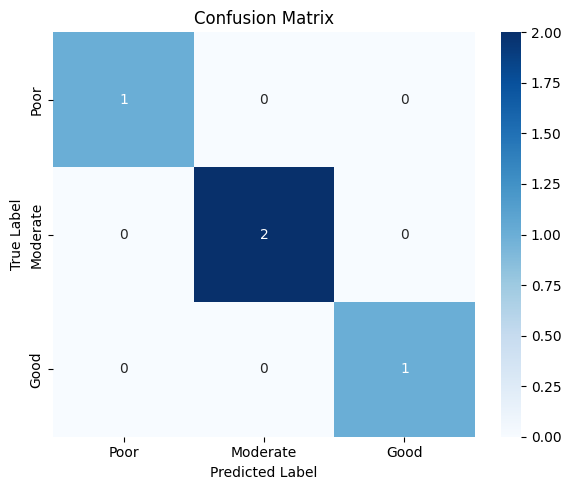

In [ ]:
#Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
#Defining class labels
labels = ['Poor', 'Moderate', 'Good']
#Plotting confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## Feature Importance

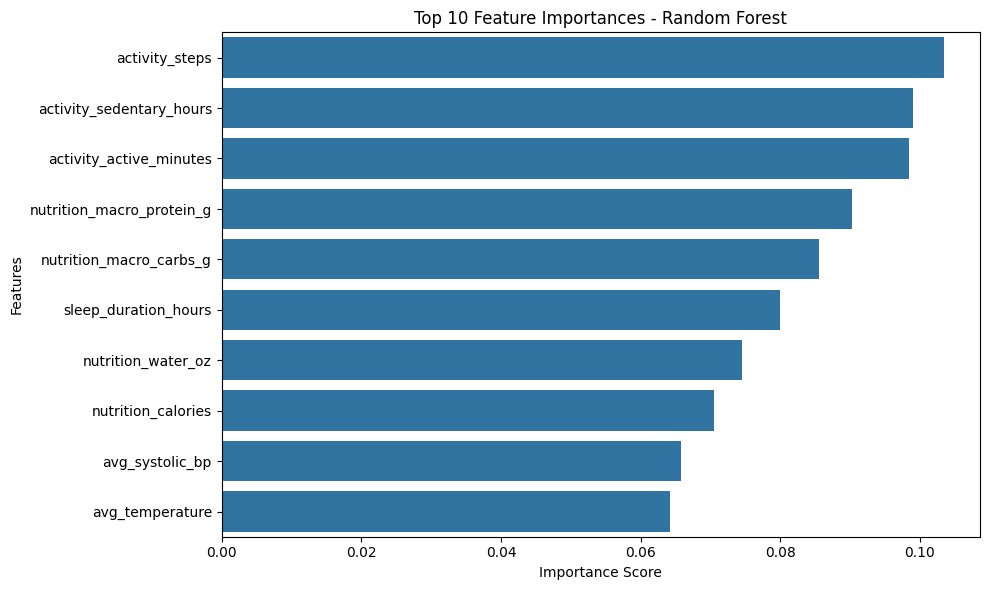

In [ ]:
# Plotting feature importances
feature_importances = pd.Series(rf.feature_importances_, index=cleaned_data_X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()